### **Malik Ouda, Noah Placke, Mounika Tarigopula, Sarah Teng, Tim Wong**
### **Unstructured Data Analytics Assignment #2 - Fall 2020**
### **Anitesh Barua - October 18, 2020**

In [ ]:
import tweepy
import csv
import pandas as pd
from string import punctuation
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Part A: Scraping tweets**

In [ ]:
# Download a file from Google Drive using FILE_ID

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
#!pip install -U -q PyDrive tweepy
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: 1rhnzJ8CD9Amdz5OMi8s4kqT5b00jY5k4
# Visit https://help.meiro.io/en/articles/2245027-where-can-i-find-the-file-id-on-google-drive
# for more details on getting the FILE ID.

def download_file(file_id, file_name):
    '''
    file_id: Make sure that you can access this file from your account or else, this will not run
    file_name: Name of the file by which you want to save
    '''
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)
    print('Downloaded file with ID {} and name {}'.format(file_id, file_name))

In [ ]:
dir = "/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2"

In [ ]:
# You can store secrets in a file or in the form of environment variables during production.
# NEVER store keys directly on notebook.

#with open(f'{dir}/secrets.txt', 'r') as file:
    #data = file.read().split('\n')

import tweepy
import pandas as pd

consumer_key = 'GrWAnYpYYyVcTirmyhgxiClSR'
consumer_secret = 'rNop20su2PNCFxcQMSFMiWzaiKE0bdd6Di4GNPUPkUW1DMbQDV'
access_key = '842475646030868480-bQPbRZHwczwwqGiBmZndfi7PYBGUDqx'
access_secret = 'sv9RHyXgJzKSS1F5UW5L0DbgWP0hgXt3JZgG1sopdAGCS'

In [ ]:
states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [ ]:
def get_query_tweets(query, num=0):
    num = 3000 if num > 3000 else num
    max_num_per_call = 2000

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []    
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    curr_count = max_num_per_call if num > max_num_per_call else num
    num -= curr_count

    new_tweets = api.search(q=query, count=curr_count, tweet_mode='extended')
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    print(f"{len(alltweets)} tweets downloaded so far")

    #keep grabbing tweets until there are no tweets left to grab
    while num > 0:
        print(f"Getting tweets before {oldest}")
        
        curr_count = max_num_per_call if num > max_num_per_call else num

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.search(q=query, count=curr_count, max_id=oldest)
        num -= curr_count
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv  
    outtweets = [[tweet.id_str, tweet.created_at, tweet.full_text, tweet.user.location] for tweet in alltweets]
    df = pd.DataFrame(outtweets, columns=["id", "created_at", "text", "location"])
    #df.to_csv(f"{dir}/scrapedTweets.csv", index=False)
    #print(df.head())
    return df

In [ ]:
# passing the parametrs in the search query
tweets_1 = get_query_tweets("2020 election", 2000)
tweets_2 = get_query_tweets("general election", 1000)
tweets_3 = get_query_tweets("us president", 2000)
tweets_4 = get_query_tweets("2020 presidential election", 1000)

83 tweets downloaded so far
100 tweets downloaded so far
80 tweets downloaded so far
81 tweets downloaded so far


In [ ]:
tweets=tweets_1.append(tweets_2, ignore_index=True)
tweets=tweets.append(tweets_3, ignore_index=True)
tweets=tweets.append(tweets_4, ignore_index=True)
print(tweets.shape)
tweets.to_csv(f"{dir}/scrapedTweets_11.csv", index=False)

(327, 4)


In [ ]:
results = pd.DataFrame(final_data)
results.to_csv('/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/tweets.csv', sep='\t')

In [ ]:
dir = "/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2"

In [ ]:
tweets_dt = pd.read_csv('tweets.csv', usecols=["tweet_text"])
tweets_dt.columns = ["Tweets"]
tweets_dt = tweets_dt.dropna()
tweets_dt = tweets_dt.replace('\n','', regex=True)

## **Part B: Word frequency analysis to find top four issues**

In [ ]:
import re
import csv
dir = "/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2"

tweets = []
df = pd.read_csv('/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/scrapedTweets.csv')
df.text = df.text.apply(eval)
df.text = df.text.str.decode('utf-8')
df.head()

,id,created_at,text,location
0,1.314310e+18,10/8/20 20:46,RT @lakotalaw: We’ve partnered with the @Stand...,"Port Aransas, TX/El Centro, CA"
1,1.314310e+18,10/8/20 20:46,RT @IngrahamAngle: Kamala Harris' refusal to a...,Athens | Greece
2,1.314310e+18,10/8/20 20:46,RT @dallasnews: When and where to vote in DeSo...,NaN
3,1.314310e+18,10/8/20 20:46,#IsraelUnitedinChrist #IUIC #Concord #IUICRadi...,Grenada
4,1.314310e+18,10/8/20 20:46,First time California voter and stoked. The ba...,New York


In [ ]:
df2 = pd.read_csv('/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/scrapedTweets_addon.csv')
df2.head()

,id,created_at,text,location
0,1.317150e+18,10/16/20 16:54,RT @AliVelshi: Early voting in the 2020 has su...,NaN
1,1.317150e+18,10/16/20 16:54,Michigan bans open carrying of guns at polling...,NaN
2,1.317150e+18,10/16/20 16:54,RT @theMRC: In keeping with the norm for the e...,"Brooklyn, New York"
3,1.317150e+18,10/16/20 16:54,RT @tomaskenn: Republicans in Florida are work...,"Rehoboth Beach, DE"
4,1.317150e+18,10/16/20 16:54,RT @NYDailyNews: EXPLAINER | How did Biden's s...,NaN


In [ ]:
df = df.append(df2)
df.drop_duplicates
tweets = list(df['text'])

In [ ]:
len(tweets)

12180

In [ ]:
stop = stopwords.words('english')
stop += ['like','dont','would','rt', 'im', 'today', 'http', 'amp', 'https', 'let']

def count(elements, a_dict): 

    # if there exists a key as "elements" then 
    # don't increase its value. Lazy but oh well
    if elements in a_dict: 
        a_dict[elements] += 1
   
    # if the dictionary does not have the key as "elements"  
    # then create a key "elements" and assign its value to 1. 
    else:
        # don't add stopwords or single character elements
        if elements not in stop and len(elements) > 1:
            a_dict.update({elements: 1})

def count2(elements, pair_dict):

    if elements in pair_dict:
        pair_dict[elements] += 1
        
    else:
        pair_dict.update({elements: 1})

In [ ]:
word_freq = {}
final_list = []
pair_freq = {}

for post in tweets:
    # here we split the lines into words and append those words to a new list at the end
    post = post.split(' ')
    word_hold = []
    for word in post:
        word = re.sub(r'[^A-Za-z0-9 ]+', '', word)
        word = word.lower()
        word_hold.append(word)

    word_hold = set(word_hold)
    word_hold = list(word_hold)
    
    pairs = []
    for word in word_hold:
        for word2 in word_hold:
            word2 = re.sub(r'[^A-Za-z0-9 ]+', '', word2)
            word2 = word2.lower()
            if word in stop or word2 in stop: continue
            if word == '' or word2 == '': continue
            if word == word2: continue
            pairs.append(tuple(sorted([word, word2])))
        pairs = list(set(pairs))

    for item in pairs:
        count2(item, pair_freq)
    
    for item in word_hold:
        final_list.append(item)

          
for element in final_list:
    count(element, word_freq)

sort_dict = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
sort_dict_10 = sort_dict[:200]
for i in sort_dict_10:
    print(i[0], i[1])

election 2619
us 1826
vote 1694
2020election 1430
trump 1424
presidential 1337
election2020 1299
biden 1248
voting 1168
early 846
debate 823
joe 806
day 804
first 798
general 765
line 687
joebiden 665
court 665
2020 661
inpers 646
georgia 640
president 628
realdonaldtrump 625
waited 606
crazy 569
mins 564
mrprunejuice 559
hrs 558
harris 545
one 523
kamala 515
new 513
see 504
time 502
supreme 493
going 489
pence 488
says 449
packing 445
barr 436
vp 429
ballot 420
lines 418
attorney 414
bidens 401
start 398
answer 395
jorgensen4potus 393
wants 388
ingrahamangle 378
ruling 377
happy 375
technical 374
lastminute 373
hourslong 373
supersite 373
marked 373
glitch 373
comment 366
refusal 364
coupled 364
cour 364
democratic 364
unwillingness 363
sit 353
virtually 350
november 335
released 331
inperson 330
report 327
trudeau 325
impeachment 323
crewcrew 321
rwpusa 320
pennlawcerl 320
inquiry 320
justin 313
china 297
win 290
result 288
virus 279
perfect 279
upcoming 274
abe 273
marshallcohen 273

In [ ]:
sort_pair = sorted(pair_freq.items(), key=lambda x: x[1], reverse=True)
sort_pair_10 = sort_pair[:10]
for i in sort_pair_10:
    print(i[0], i[1])

('election', 'us') 995
('election', 'presidential') 949
('line', 'vote') 656
('day', 'early') 618
('early', 'vote') 599
('day', 'vote') 594
('georgia', 'vote') 593
('early', 'first') 590
('day', 'first') 589
('vote', 'waited') 586


In [ ]:
sort_pair[0][0][0]
separated_pairs = []

for item in sort_pair:
  word1 = item[0][0]
  word2 = item[0][1]
  freq = item[1]
  separated_pairs.append([word1, word2, freq])

separated_pairs[:10]

[['election', 'us', 995],
 ['election', 'presidential', 949],
 ['line', 'vote', 656],
 ['day', 'early', 618],
 ['early', 'vote', 599],
 ['day', 'vote', 594],
 ['georgia', 'vote', 593],
 ['early', 'first', 590],
 ['day', 'first', 589],
 ['vote', 'waited', 586]]

In [ ]:
writer = csv.writer(open(f'{dir}/word_freq.csv', 'w'))
for item in sort_dict:
    writer.writerow([item[0], item[1]])

In [ ]:
writer2 = csv.writer(open(f'{dir}/word_pair_freq.csv', 'w'))
for item in sort_pair:
    writer2.writerow([item[0], item[1]])

In [ ]:
writer3 = csv.writer(open(f'{dir}/sep_word_pair_freq.csv', 'w'))
for item in separated_pairs:
    writer3.writerow([item[0], item[1], item[2]])

In [ ]:
aliases = []
names = []

with open(f'{dir}/list_of_candidate_names.csv') as f:
    rows = csv.reader(f, delimiter = ',')
    for row in rows:
      row[0] = re.sub(r'[^A-Za-z0-9 ]+', '', row[0])
      aliases.append(row[0])
      names.append(row[1])

### **4 Top Issues in Tweets Based on Word Frequency:**

## 'covid', 'china', 'debate', 'economy'

## **Part C: Lift analysis between each issue and each candidate**

In [ ]:
word_freq = pd.read_csv("/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/word_freq.csv", index_col=0, header=None, names=['count'])
word_freq.head()

,count
election,2619
us,1826
vote,1694
2020election,1430
trump,1424


In [ ]:
pair_freq = pd.read_csv("/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/sep_word_pair_freq.csv", header=None, names=['word1', 'word2', 'count'])
pair_freq.head()

,word1,word2,count
0,election,us,995
1,election,presidential,949
2,line,vote,656
3,day,early,618
4,early,vote,599


In [ ]:
n = pd.read_csv("/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/scrapedTweets.csv").shape[0]

In [ ]:
def calc_lift(word1, word2, n, counts, pair_counts):
  if word1 == word2:
    return None
  word1, word2 = sorted([word1, word2])
  if not ((pair_freq['word1'] == word1) & (pair_freq['word2'] == word2)).any():
    return 0
  nom = n * pair_counts[(pair_freq['word1'] == word1) & (pair_freq['word2'] == word2)]['count']
  den = counts.loc[word1]['count'] * counts.loc[word2]['count']
  return float(nom / den)

In [ ]:
top_4_issues = ['covid', 'debate', 'economy', 'china']
candidates = ['trump', 'biden']

matrix_attrs = []
for issue in top_4_issues:
  lifts = []
  for candidate in candidates:
    lifts.append(calc_lift(issue, candidate, n, word_freq, pair_freq))
  matrix_attrs.append(lifts)

In [ ]:
lift_matrix = pd.DataFrame(matrix_attrs, columns=candidates, index=top_4_issues)
lift_matrix

,trump,biden
covid,5.007818,0.387393
debate,1.123116,3.929240
economy,0.636587,1.452724
china,6.970307,0.088044


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
  
stop = stopwords.words('english')
stop += ['like','dont','would','rt', 'im', 'today', 'http', 'amp', 'https', 'let', '@']
tweets_filtered = [word_tokenize(w.lower()) for w in tweets]
new =  []
for s in tweets_filtered:
    sent = []
    for w in s:
        if w not in stop:
            if w in aliases:
                w = names[aliases.index(w)]
            sent.append(w)
    new.append(sent)
tweets_filtered = new
tweets_filtered[:5]

[['lakotalaw',
  ':',
  '’',
  'partnered',
  'standingrockst',
  'run',
  'joint',
  'phone',
  'banks',
  'tribal',
  'members',
  'activate',
  'neighbors',
  '&',
  ';',
  'native',
  'vot…'],
 ['ingrahamangle',
  ':',
  'kamala',
  'harris',
  "'",
  'refusal',
  'answer',
  'vp',
  'pence',
  ',',
  'coupled',
  'joe',
  'biden',
  "'s",
  'unwillingness',
  'comment',
  'packing',
  'supreme',
  'cour…'],
 ['dallasnews',
  ':',
  'vote',
  'desoto',
  '2020',
  'elections',
  ',',
  'including',
  'early',
  'voting',
  'election',
  'day',
  'november',
  '#',
  'localdesot…'],
 ['#',
  'israelunitedinchrist',
  '#',
  'iuic',
  '#',
  'concord',
  '#',
  'iuicradioshow',
  '#',
  'biblebookofourfathers',
  '#',
  'israelites',
  '#',
  '12tribes',
  '#',
  'repent',
  '#',
  'jews…',
  ':',
  '//t.co/x5gjcmjzss'],
 ['first',
  'time',
  'california',
  'voter',
  'stoked',
  '.',
  'ballot',
  'box',
  '!',
  '.',
  '#',
  '2020election',
  '#',
  'ivoted',
  'san',
  'francis

## **Part D: Sentiment analysis for each issue and candidate**

In [ ]:
!pip install vaderSentiment

In [ ]:
 # Use Vadar for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [ ]:
sentiment_analyzer_scores('')['compound']

0.0

In [ ]:
# TODO: only grab tweets that contain candidate and issue - remove stop words - look at window around candidate and issue 
# sentiment_tweets = []
# for post in tweets_filtered:
#     if ('biden' in post or 'trump' in post) and any(issue in post for issue in top_4_issues):
#         sentiment_tweets.append(' '.join(post))
# sentiment_tweets[:5]

biden = dict()
trump = dict()

for cand in candidates:
    for issue in top_4_issues:
        for post in tweets_filtered:
            if cand in post and issue in post:
                cand_idx = post.index(cand)
                issue_idx = post.index(issue)
                i, j = min(cand_idx, issue_idx), max(cand_idx, issue_idx)
                if i >= 2:
                    i -= 2
                if j <= len(post) - 3:
                    j += 2
                span = post[i:j+1]
                if cand == 'biden':
                    if issue in biden.keys():
                        biden[issue].append(' '.join(span))
                    else:
                        biden[issue] = [' '.join(span)]
                if cand == 'trump':
                    if issue in trump.keys():
                        trump[issue].append(' '.join(span))
                    else:
                        trump[issue] = [' '.join(span)]

In [ ]:
biden_sents = dict()
trump_sents = dict()

for cand in candidates:
    for issue in top_4_issues:
        if cand == 'biden':
            biden_sents[issue] = 0
            for post in biden[issue]:
                biden_sents[issue] += sentiment_analyzer_scores(post)['compound']
            biden_sents[issue] /= len(biden[issue])
        if cand == 'trump':
            trump_sents[issue] = 0
            for post in trump[issue]:
                trump_sents[issue] += sentiment_analyzer_scores(post)['compound']
            trump_sents[issue] /= len(trump[issue])
print(biden_sents)
print(trump_sents)

{'covid': -0.039, 'debate': 0.52585201072386, 'economy': 0.30915000000000004, 'china': 0.105375}
{'covid': -0.0004859374999999994, 'debate': 0.42099030837004364, 'economy': 0.4959, 'china': 0.299562237762238}


In [ ]:
issues = biden_sents.keys()
biden_vals = biden_sents.values()
trump_vals = trump_sents.values()
data = [list(biden_vals), list(trump_vals)]

In [ ]:
sentiments = pd.DataFrame(data, columns=issues, index=['biden', 'trump'])
sentiments

,covid,debate,economy,china
biden,-0.039000,0.525852,0.30915,0.105375
trump,-0.000486,0.420990,0.49590,0.299562


## **Part E: Network visualization**

### For lift analysis, the graph shows that almost every term was positive. This is indicated by the thick green lines.

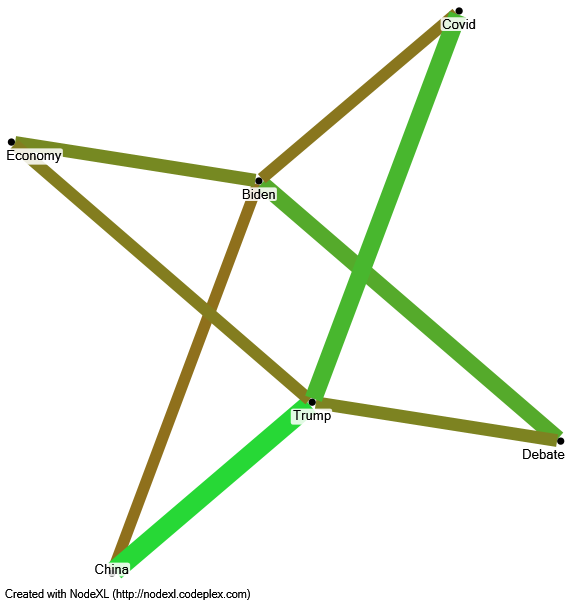

### Here we can see the sentiment graph created in NodeXL. The line thickness and color indicate whether or not the sentiment was positive or negative.

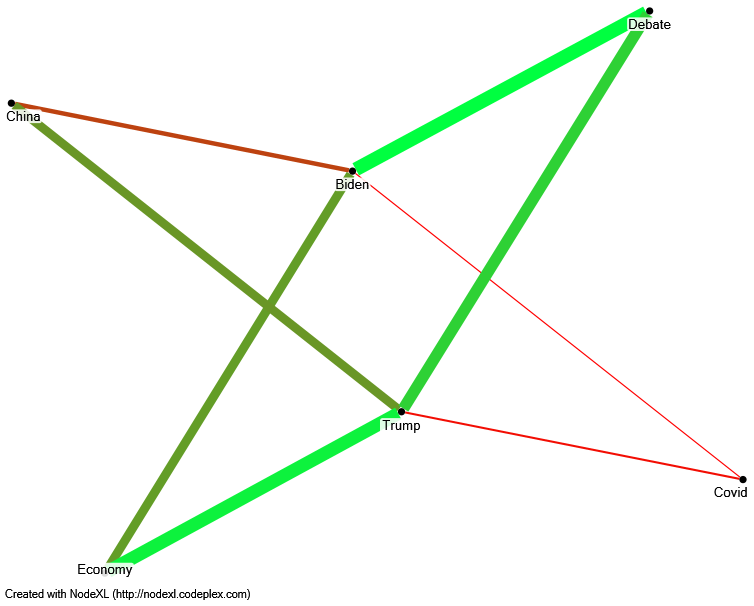

## **Part F: Sentiment analysis in battleground states for each candidate**

In [ ]:
#By using the location data in the tweets data we are going to find OVERALL sentiment about
#Mr. Biden and Mr. Trump in the battleground states of Michigan, Pennsylvania and Wisconsin.
locations = list(df['location'])
locations[:20]

['Port Aransas, TX/El Centro, CA',
 'Athens | Greece',
 nan,
 'Grenada',
 'New York',
 'Philadelphia, PA',
 'Virginia Beach , Virginia',
 nan,
 nan,
 'Bernalillo County, NM',
 'New York, NY',
 nan,
 'San Diego, California',
 nan,
 nan,
 'Victoria, TX',
 "The Palm of God's Right Hand",
 'Kentucky, USA',
 nan,
 'US Land Cession 243']

In [ ]:
Loc_df = pd.read_csv('/content/drive/Shared drives/Unstructured Data Analytics/Assignment 2/battleground_states.csv', header=None, names=['City', 'State'])
Loc_df

,City,State
0,detroit,Michigan
1,grand rapids,Michigan
2,warren city,Michigan
3,sterling heights,Michigan
4,ann arbor,Michigan
...,...,...
139,manasha,Wisconsin
140,wisconsin rapids,Wisconsin
141,ashwaubenon,Wisconsin
142,oconomowoc,Wisconsin


In [ ]:
cities = list(Loc_df.City)
cities = set([c.lower() for c in cities])

In [ ]:
states = ['wisconsin', 'pennsylvania', 'michigan', 'wi', 'pa', 'mi']
def filt_state(s):
    s = str(s)
    s = s.lower()
    find_state = s.split()
    if any(state in find_state for state in states):
        return True
    if any(city in s for city in cities):
        return True
    return False

In [ ]:
df.location = df.location.str.replace('[^0-9a-zA-Z]+', ' ')
mask = df.location.apply(filt_state)
df[mask]

,id,created_at,text,location
5,1.314310e+18,10/8/20 20:46,#2020Election https://t.co/8atMSMcEvY,Philadelphia PA
30,1.314300e+18,10/8/20 20:37,RT @lakotalaw: We’ve partnered with the @Stand...,Pennsylvania USA
33,1.314300e+18,10/8/20 20:36,RT @PhillyInquirer: We've published our #2020E...,PA
56,1.314300e+18,10/8/20 20:31,RT @PhillyInquirer: We've published our #2020E...,Philadelphia PA
94,1.314300e+18,10/8/20 20:21,"RT @NNTimesNews: So, @realDonaldTrump can't sh...",Michigan
...,...,...,...,...
1079,1.317590e+18,10/17/20 22:00,"RT @MIAttyGen: Are you or a loved one deaf, de...",Bloomfield Township MI
1094,1.317590e+18,10/17/20 21:59,"Are you or a loved one deaf, deafblind, or har...",Michigan
1129,1.317590e+18,10/17/20 21:57,@TielaKegs @reidepstein Go to one of your earl...,Pennsylvania USA
1255,1.317590e+18,10/17/20 22:01,RT @RealJamesWoods: Republicans simply deserve...,Detroit MI


In [ ]:
tweets = list(df[mask].text)

In [ ]:
stop = stopwords.words('english')
stop += ['like','dont','would','rt', 'im', 'today', 'http', 'amp', 'https', 'let', '@']
tweets_filtered = [word_tokenize(w.lower()) for w in tweets]
new =  []
for s in tweets_filtered:
    sent = []
    for w in s:
        if w not in stop:
            if w in aliases:
                w = names[aliases.index(w)]
            sent.append(w)
    new.append(sent)
tweets_filtered = new
tweets_filtered[:5]

[['#', '2020election', ':', '//t.co/8atmsmcevy'],
 ['lakotalaw',
  ':',
  '’',
  'partnered',
  'standingrockst',
  'run',
  'joint',
  'phone',
  'banks',
  'tribal',
  'members',
  'activate',
  'neighbors',
  '&',
  ';',
  'native',
  'vot…'],
 ['phillyinquirer',
  ':',
  "'ve",
  'published',
  '#',
  '2020election',
  'ballot',
  'guide',
  'pennsylvania',
  'five',
  'languages',
  ':',
  'english',
  ',',
  'spanish',
  ',',
  'traditional',
  'chines…'],
 ['phillyinquirer',
  ':',
  "'ve",
  'published',
  '#',
  '2020election',
  'ballot',
  'guide',
  'pennsylvania',
  'five',
  'languages',
  ':',
  'english',
  ',',
  'spanish',
  ',',
  'traditional',
  'chines…'],
 ['nntimesnews',
  ':',
  ',',
  'trump',
  'ca',
  "n't",
  'show',
  '#',
  'virtual',
  'town',
  'hall',
  '#',
  'presidentialdebate',
  'joebiden',
  ',',
  'host',
  'whole',
  'virtu…']]

In [ ]:
biden_sent, biden_ct, trump_sent, trump_ct = 0,0,0,0
for post in tweets_filtered:
    if 'biden' in post and 'trump' not in post:
        biden_ct += 1
        biden_sent += sentiment_analyzer_scores(' '.join(post))['compound']
    if 'trump' in post and 'biden' not in post:
        trump_ct += 1
        trump_sent += sentiment_analyzer_scores(' '.join(post))['compound']
biden_sent /= biden_ct
trump_sent /= trump_ct
print('Biden BG sentiment:', biden_sent)
print('Trump BG sentiment:', trump_sent)

Biden BG sentiment: 0.2631550000000001
Trump BG sentiment: 0.29444680851063837


## **Part G: Insights and advice**
### **What insights and actionable advice would you give to the two candidates based on your analyses in C, D, E and F above?**
 
Due to the recent updates to the Twitter API, the bulk of our tweets were truncated to 140 characters when we used Tweepy to scrape our tweets, resulting in a lot of data loss and cut-off words. When we discovered this, we attempted to mediate it by employing Tweepy’s ‘extended’ tweet feature, that would scrape entire tweets instead of limiting it to 140 characters. With this feature, we were only able to scrape ~1000 extended tweets, but we included these in our overall tweets dataset. We also encountered issues with our location analysis because twitter locations are not standardized and all formatted differently, so we may have lost a number of tweets due to poorly defined locations or even no locations at all. Due to a combination of these issues, our dataset was smaller than we would’ve preferred, but below are the insights we were able to gather. 
 
**The top four issues we identified through our word frequency analysis were ‘covid’, ‘debate’, ‘economy’, and ‘china’.**
 
\

### **Trump**
 
**Lift Analysis**
*  Through our lift analysis of Trump against the four top issues we identified, we discovered that many people associate Trump with ‘covid, ‘debate’, and ‘china’, since these lift values were greater than 1. This means that people often tweet about Trump regarding these issues, whether it be about the fact that Trump got sick with COVID-19, that he performed well/poorly at the presidential debate, or that he is dealing with issues relating to China. Since we do not yet know whether these associations are positive or negative through sentiment analysis, we recommend that the Trump campaign be aware of these strong lift values and steer the conversation more towards other issues that the campaign would rather focus on. For example, our lift analysis did not show that Trump is strongly associated with the word ‘economy,’ and if the Trump campaign wants to stir conversations about how Trump has improved the economy while he’s been in office, this would be a good indication that they need to put greater efforts into associating Trump with an improving economy. 
 
**Sentiment Analysis & NodeXL Network Visualization**
*  Through our sentiment analysis of Trump against the top four issues we identified (and what we can visually see in the network visualization), we discovered that Trump is most positively associated with the ‘economy,’ followed by ‘debate’, ‘china’, and then ‘covid’. ‘Covid’ was the only issue that Trump was negatively associated with, which could point to the week that Trump actually got sick with COVID-19, but it could also indicate that tweets about Trump and covid were (slightly) negative in regards to the way that Trump has handled the pandemic and the entire situation around COVID-19. Trump’s sentiment values associated with the words ‘economy’ and ‘china’ were both higher than those associated with Biden, meaning that there were more positive tweets connecting Trump with these two terms than there were for Joe Biden. From the network visualization graph, we can also see that Trump only has one negative association, whereas Biden has two negative associations. Trump’s higher values associated with ‘economy’ and ‘china’ could most likely mean that Trump supporters are often tweeting about Trump’s accomplishments in regards to the improving economy and relations/situations surrounding China. In response to this, the Trump campaign team should capitalize on these positive associations and continue to feed information to the media about how Trump has improved the economy and also managed relations with China throughout the pandemic. They could also address the one negative sentiment value (covid) and give information to the media about how Trump has handled the coronavirus pandemic in a positive light; this could mean that they could highlight the fact that Trump got sick with COVID-19 and came out of it alive and well, or they could highlight the fact that Trump has managed to keep the economy afloat despite the obstacles that COVID-19 has presented. 
 
**Location Analysis**
*  Through our sentiment analysis of Trump in each of the three battleground states (Michigan, Pennsylvania, & Wisconsin), we discovered that Trump is actually more positively associated with these states than Joe Biden. This means that Trump is more positively favored over voters who live in these three states, even though the gap between the two candidates is very small (0.294 vs. 0.263). We recommend to the Trump campaign that they continue to campaign in these three battleground states to capture more voters in these states and widen the gap between Trump and Biden supporters. According to our data, Trump is currently leading in these states, but not by much, so any efforts that the Trump campaign is taking in these states should be maximized to ensure that Trump can sustain his minor lead. 
 

\
 
### **Biden**
 
**Lift Analysis**
* According to our lift analysis related to Joe Biden, we can see that when users tweet about Biden, the tweets pair him with ‘debate’ and ‘economy’ mostly. Both terms have a lift value greater than 1, indicating that Biden and the terms are mentioned together. As for ‘China’ and ‘covid’, the lift values are less than 1 indicating these terms rarely appear in the same tweet as Biden. As far as recommendations to Biden and his campaign, we believe he is on the right track. There is little to be said about Biden and covid considering he has no say in the country’s response to the pandemic therefore it is better to focus on other issues. For China, he could possibly be a little more outspoken against their atrocities and the negative news related to them. There is nothing more patriotic than standing up against a country doing wrong, and Biden should be taking advantage of that. 
 
**Sentiment Analysis & NodeXL Network Visualization**
* Through our sentiment analysis of Biden against our top four issues, we found that Biden has positive associations of the four issues in the following order: ‘Debate’, ‘economy’, ‘china’, ‘covid’. ‘Debate’ and ‘economy’ positive associates could be regarding the recent presidential debate and interviews regarding Biden's economic plan if he were to become president. The positive sentiment analysis with the word ‘china’ could be indicating Biden’s plan to improve the US relations with China. The negative sentiment analysis of ‘covid’ could be because of the people that are of interest to the opposing party tweeting negative connotations about how Biden may not handle covid well as president. It would be best for Biden to tackle the negative ‘covid’ sentiment analysis to ensure he remediate the negative connotations of the covid from potential opposures. From there, Biden should be continuing to focus on staying strong in the debates to come and encourage conversations on the economy and his future plans as president to stimulate the economy after economic downturns from covid.
 
 
**Location Analysis**
* When it comes to the battleground states, Biden seems to be lagging a little behind Trump for positive sentiment. Biden has an average of .263 while Trump sits at .294. This number is not too large of a difference, and Biden can catch up easily. In order to win these states, Biden must campaign hard to generate a larger gap in positive sentiment. Focusing on the issues that these battleground states hold dear to them is the best gameplan. The only goal is to make the general population view you in a positive light, so don’t change up core values, but make sure to speak about what the battleground states care about most. If this is done successfully, a higher positive sentiment could be achieved which in turn could lead to more votes coming in for Biden.

